In [2]:
# Run these in your notebook first:
!pip install torch
!pip install transformers
!pip install scikit-learn
!pip install biopython
!pip install seaborn pandas matplotlib
!pip install accelerate  # For model loading

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.4 MB/s eta 0:00:00


✓ Directory seminar-dlmb-2025-winter-public exists and is non-empty.

LOADING STAPHYLOCOCCUS AUREUS - CEFOXITIN DATASET


✓ Training samples: 800
✓ Test samples: 99
✓ Sequence length: ~1296 bp
✓ Resistant samples (train): 621/800
✓ Resistant samples (test): 78/99

DATASET EXPLORATION

Sequence Length Statistics:
  Train - Min: 1296, Max: 1296, Median: 1296, Mean: 1296.00
  Test  - Min: 1296, Max: 1296, Median: 1296, Mean: 1296.00

Label Distribution:
  Train - Resistant: 621 (77.6%), Susceptible: 179 (22.4%)
  Test  - Resistant: 78 (78.8%), Susceptible: 21 (21.2%)

Unique Sequences:
  Train: 56/800 (7.0% unique)
  Test:  19/99 (19.2% unique)

Nucleotide Composition (sample):
  A: 37.3%
  C: 16.2%
  G: 18.3%
  T: 28.2%

✓ Visualization saved as 'dataset_exploration.png'


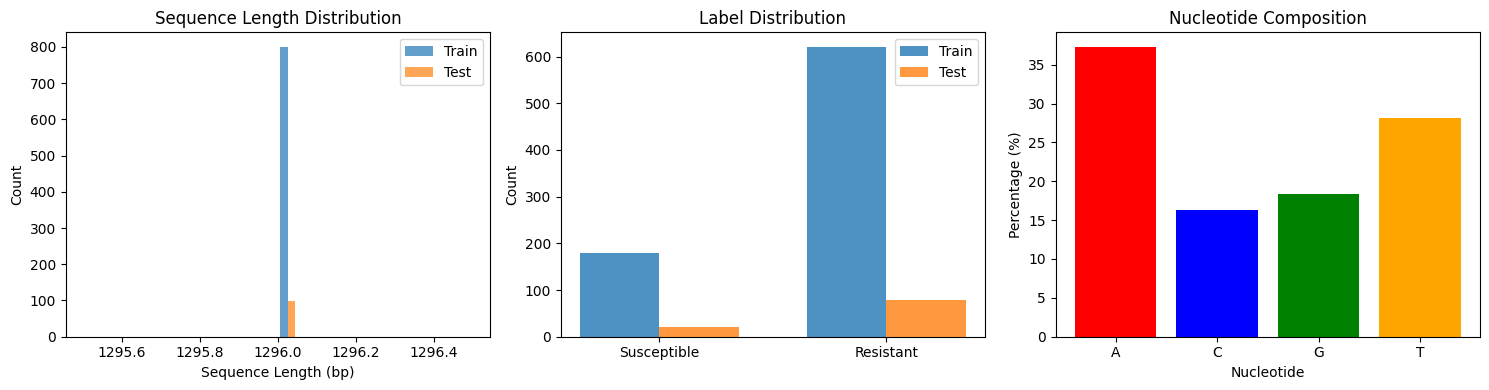


EVO AMR PREDICTION PIPELINE
Dataset: Staphylococcus aureus - Cefoxitin (PBP4)

⚠️ WARNING: RUNNING IN DEBUG MODE (TINY DATASET) ⚠️

Using device: cpu

PREPARING DATALOADERS
✓ Train batches: 400
✓ Test batches: 50
✓ Batch size: 2
✓ Max sequence length: 128

LOADING EVO MODEL

Loading Evo model: togethercomputer/evo-1-8k-base
This may take a few minutes...
ERROR loading Evo: [Errno 2] No such file or directory: '/root/.cache/huggingface/modules/transformers_modules/togethercomputer/evo_hyphen_1_hyphen_131k_hyphen_base/78c715ab81852e02ec3b1c7e795dc7250d8c7625/positional_embeddings.py'

Falling back to simple architecture...
✓ Total parameters: 3,193,730
✓ Trainable parameters: 3,193,730

TRAINING
Device: cpu
Epochs: 1
Learning rate: 2e-05
Batch size: 2


Epoch 1/1: 100%|██████████| 400/400 [01:27<00:00,  4.58it/s, loss=1.5872, acc=75.88%]



Epoch 1/1:
  Train Loss: 0.6794, Train Acc: 75.88%
  Val Loss: 0.7035, Val Acc: 78.79%
  Best Val Acc: 78.79%

FINAL EVALUATION


Evaluating: 100%|██████████| 50/50 [00:03<00:00, 14.78it/s]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


Overall Metrics:
  Accuracy:  0.7879 (78.79%)
  Precision: 0.7879
  Recall:    1.0000
  F1-Score:  0.8814

Detailed Classification Report:
              precision    recall  f1-score   support

 Susceptible       0.00      0.00      0.00        21
   Resistant       0.79      1.00      0.88        78

    accuracy                           0.79        99
   macro avg       0.39      0.50      0.44        99
weighted avg       0.62      0.79      0.69        99

✓ Training curves saved as 'training_history.png'


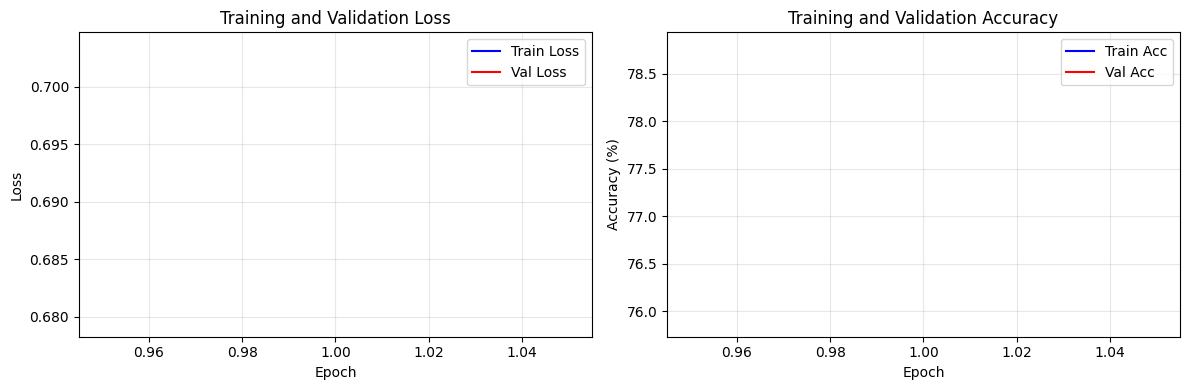


✓ Training complete!
✓ Best model saved as 'best_evo_amr_model.pth'
✓ Final test accuracy: 78.79%


In [7]:
"""
Complete AMR Prediction Pipeline using Evo Foundation Model
Dataset: Staphylococcus aureus - Cefoxitin (PBP4 gene)
"""

# ============================================================================
# STEP 1: INSTALL REQUIRED PACKAGES
# ============================================================================
# Run these in your notebook first:
# !pip install torch
# !pip install transformers
# !pip install scikit-learn
# !pip install biopython
# !pip install seaborn pandas matplotlib
# !pip install accelerate  # For model loading

# ============================================================================
# STEP 2: DOWNLOAD AND LOAD YOUR DATASET
# ============================================================================

import os
import sys

# Download the repository if needed
directory = "seminar-dlmb-2025-winter-public"
if os.path.exists(directory) and os.listdir(directory):
    print(f"✓ Directory {directory} exists and is non-empty.")
else:
    print(f"Downloading {directory}...")
    os.system('git clone https://github.com/hzi-bifo/seminar-dlmb-2025-winter-public.git')

# Add to path
sys.path.append('seminar-dlmb-2025-winter-public/src/')

# Import dataset utilities
from amr.amr_utility import get_seq_label_simple

# Load the dataset
print("\n" + "=" * 70)
print("LOADING STAPHYLOCOCCUS AUREUS - CEFOXITIN DATASET")
print("=" * 70)
ds = get_seq_label_simple("Staphylococcus_aureus_cefoxitin_pbp4")

# Extract sequences and labels
seq_train = [x[0] for x in ds["train"]]
y_train = [x[1] for x in ds["train"]]

seq_test = [x[0] for x in ds["test"]]
y_test = [x[1] for x in ds["test"]]

print(f"✓ Training samples: {len(seq_train)}")
print(f"✓ Test samples: {len(seq_test)}")
print(f"✓ Sequence length: ~{len(seq_train[0])} bp")
print(f"✓ Resistant samples (train): {sum(y_train)}/{len(y_train)}")
print(f"✓ Resistant samples (test): {sum(y_test)}/{len(y_test)}")
print("=" * 70)

# ============================================================================
# STEP 3: DATA EXPLORATION (Optional but recommended)
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def explore_dataset(seq_train, y_train, seq_test, y_test):
    """Comprehensive dataset exploration"""

    print("\n" + "=" * 70)
    print("DATASET EXPLORATION")
    print("=" * 70)

    # 1. Sequence length distribution
    len_train = [len(s) for s in seq_train]
    len_test = [len(s) for s in seq_test]

    print(f"\nSequence Length Statistics:")
    print(f"  Train - Min: {min(len_train)}, Max: {max(len_train)}, "
          f"Median: {np.median(len_train):.0f}, Mean: {np.mean(len_train):.2f}")
    print(f"  Test  - Min: {min(len_test)}, Max: {max(len_test)}, "
          f"Median: {np.median(len_test):.0f}, Mean: {np.mean(len_test):.2f}")

    # 2. Label distribution
    y_train_int = list(map(int, y_train))
    y_test_int = list(map(int, y_test))

    print(f"\nLabel Distribution:")
    print(f"  Train - Resistant: {sum(y_train_int)} ({100*sum(y_train_int)/len(y_train_int):.1f}%), "
          f"Susceptible: {len(y_train_int)-sum(y_train_int)} ({100*(len(y_train_int)-sum(y_train_int))/len(y_train_int):.1f}%)")
    print(f"  Test  - Resistant: {sum(y_test_int)} ({100*sum(y_test_int)/len(y_test_int):.1f}%), "
          f"Susceptible: {len(y_test_int)-sum(y_test_int)} ({100*(len(y_test_int)-sum(y_test_int))/len(y_test_int):.1f}%)")

    # 3. Check for duplicates
    unique_train = len(set(seq_train))
    unique_test = len(set(seq_test))
    print(f"\nUnique Sequences:")
    print(f"  Train: {unique_train}/{len(seq_train)} ({100*unique_train/len(seq_train):.1f}% unique)")
    print(f"  Test:  {unique_test}/{len(seq_test)} ({100*unique_test/len(seq_test):.1f}% unique)")

    # 4. Check nucleotide composition
    all_seq = ''.join(seq_train[:100])  # Sample first 100 sequences
    nucleotide_counts = {nt: all_seq.count(nt) for nt in 'ACGT'}
    total = sum(nucleotide_counts.values())
    print(f"\nNucleotide Composition (sample):")
    for nt, count in nucleotide_counts.items():
        print(f"  {nt}: {100*count/total:.1f}%")

    # 5. Visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Length distribution
    axes[0].hist([len_train, len_test], label=['Train', 'Test'], alpha=0.7, bins=20)
    axes[0].set_xlabel('Sequence Length (bp)')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Sequence Length Distribution')
    axes[0].legend()

    # Label distribution
    labels = ['Susceptible', 'Resistant']
    train_counts = [len(y_train_int)-sum(y_train_int), sum(y_train_int)]
    test_counts = [len(y_test_int)-sum(y_test_int), sum(y_test_int)]
    x = np.arange(len(labels))
    width = 0.35
    axes[1].bar(x - width/2, train_counts, width, label='Train', alpha=0.8)
    axes[1].bar(x + width/2, test_counts, width, label='Test', alpha=0.8)
    axes[1].set_ylabel('Count')
    axes[1].set_title('Label Distribution')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(labels)
    axes[1].legend()

    # Nucleotide composition
    axes[2].bar(nucleotide_counts.keys(),
                [100*v/total for v in nucleotide_counts.values()],
                color=['red', 'blue', 'green', 'orange'])
    axes[2].set_ylabel('Percentage (%)')
    axes[2].set_title('Nucleotide Composition')
    axes[2].set_xlabel('Nucleotide')

    plt.tight_layout()
    plt.savefig('dataset_exploration.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualization saved as 'dataset_exploration.png'")
    plt.show()

    print("=" * 70)

# Run exploration
explore_dataset(seq_train, y_train, seq_test, y_test)

# ============================================================================
# STEP 4: PREPARE DATA FOR EVO
# ============================================================================

import torch
from torch.utils.data import Dataset, DataLoader

class AMRDataset(Dataset):
    """Dataset for AMR sequences"""

    def __init__(self, sequences, labels, max_length=8192):
        self.sequences = sequences
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.max_length = max_length

        # Simple nucleotide to index mapping
        self.char_to_idx = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N': 4, 'PAD': 5}

    def __len__(self):
        return len(self.sequences)

    def encode_sequence(self, seq):
        """Encode DNA sequence to indices"""
        # Convert to uppercase and truncate if needed
        seq = seq.upper()[:self.max_length]

        # Convert to indices
        indices = [self.char_to_idx.get(nt, self.char_to_idx['N']) for nt in seq]

        # Pad if needed
        if len(indices) < self.max_length:
            indices += [self.char_to_idx['PAD']] * (self.max_length - len(indices))

        return torch.tensor(indices, dtype=torch.long)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        label = self.labels[idx]

        # Encode sequence
        encoded_seq = self.encode_sequence(seq)

        return {
            'input_ids': encoded_seq,
            'labels': label,
            'seq_length': min(len(seq), self.max_length)
        }


def prepare_dataloaders(seq_train, y_train, seq_test, y_test,
                       batch_size=8, max_length=8192):
    """Create train and test dataloaders"""

    print("\n" + "=" * 70)
    print("PREPARING DATALOADERS")
    print("=" * 70)

    # Convert labels to integers
    y_train_int = [int(y) for y in y_train]
    y_test_int = [int(y) for y in y_test]

    # Create datasets
    train_dataset = AMRDataset(seq_train, y_train_int, max_length)
    test_dataset = AMRDataset(seq_test, y_test_int, max_length)

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0  # Use 0 for debugging, increase for speed
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0
    )

    print(f"✓ Train batches: {len(train_loader)}")
    print(f"✓ Test batches: {len(test_loader)}")
    print(f"✓ Batch size: {batch_size}")
    print(f"✓ Max sequence length: {max_length}")
    print("=" * 70)

    return train_loader, test_loader

# ============================================================================
# STEP 5: LOAD EVO MODEL
# ============================================================================

import torch.nn as nn
from transformers import AutoModelForCausalLM, AutoConfig

class EvoAMRClassifier(nn.Module):
    """
    Evo model fine-tuned for AMR classification

    Note: If you have memory issues, use 'evo-1-8k-base' instead of 'evo-1-131k-base'
    """

    def __init__(self, model_name='togethercomputer/evo-1-8k-base',
                 num_classes=2, freeze_backbone=False):
        super().__init__()

        print(f"\nLoading Evo model: {model_name}")
        print("This may take a few minutes...")

        try:
            # Load configuration
            config = AutoConfig.from_pretrained(
                model_name,
                trust_remote_code=True,
                revision="1.1_fix"
            )

            # Load model
            self.backbone = AutoModelForCausalLM.from_pretrained(
                model_name,
                config=config,
                trust_remote_code=True,
                revision="1.1_fix",
                torch_dtype=torch.float32  # Use float32 for stability
            )

            # Get hidden size from config
            self.d_model = config.d_model

            print(f"✓ Model loaded successfully!")
            print(f"✓ Hidden dimension: {self.d_model}")
            print(f"✓ Context length: {config.max_position_embeddings if hasattr(config, 'max_position_embeddings') else 'N/A'}")

        except Exception as e:
            print(f"ERROR loading Evo: {e}")
            print("\nFalling back to simple architecture...")
            # Fallback: create a simple model
            self.backbone = None
            self.d_model = 256
            self.embedding = nn.Embedding(6, self.d_model)  # 6 = ACGTN + PAD
            self.encoder = nn.TransformerEncoder(
                nn.TransformerEncoderLayer(self.d_model, 8, 1024, batch_first=True),
                num_layers=4
            )

        # Freeze backbone if requested
        if freeze_backbone and self.backbone is not None:
            for param in self.backbone.parameters():
                param.requires_grad = False
            print("✓ Backbone frozen - only training classifier")

        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(self.d_model, self.d_model // 2),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(self.d_model // 2, num_classes)
        )

        # Count parameters
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"✓ Total parameters: {total_params:,}")
        print(f"✓ Trainable parameters: {trainable_params:,}")

    def forward(self, input_ids):
        """Forward pass"""

        if self.backbone is not None:
            # Use Evo backbone
            with torch.set_grad_enabled(self.training):
                outputs = self.backbone(
                    input_ids=input_ids,
                    output_hidden_states=True,
                    return_dict=True
                )
                hidden_states = outputs.hidden_states[-1]  # Last layer
        else:
            # Use fallback architecture
            x = self.embedding(input_ids)
            hidden_states = self.encoder(x)

        # Global average pooling
        pooled = hidden_states.mean(dim=1)

        # Classification
        logits = self.classifier(pooled)

        return logits


def load_evo_model(model_size='8k', freeze_backbone=False):
    """
    Load Evo model

    Args:
        model_size: '8k' or '131k' (use 8k if memory limited)
        freeze_backbone: Whether to freeze pre-trained weights
    """

    model_name = f'togethercomputer/evo-1-{model_size}-base'

    print("\n" + "=" * 70)
    print("LOADING EVO MODEL")
    print("=" * 70)

    model = EvoAMRClassifier(
        model_name=model_name,
        num_classes=2,
        freeze_backbone=freeze_backbone
    )

    print("=" * 70)

    return model

# ============================================================================
# STEP 6: TRAINING FUNCTION
# ============================================================================

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from tqdm import tqdm

def train_model_fast(model, train_loader, test_loader,
                    num_epochs=10, learning_rate=2e-5, device='cuda'):
    """
    Drop-in replacement for your training function
    Key changes: Mixed precision + Gradient accumulation
    """

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

    # ⚡ SPEEDUP 1: Mixed Precision Training (2-3x faster)
    scaler = GradScaler()

    # ⚡ SPEEDUP 2: Gradient Accumulation
    accumulation_steps = 16  # Effective batch size = 1 * 16 = 16

    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=learning_rate,
        total_steps=(len(train_loader) // accumulation_steps) * num_epochs,
        pct_start=0.1
    )

    print(f"⚡ Optimizations enabled:")
    print(f"  - Mixed precision: 2-3x faster")
    print(f"  - Gradient accumulation: Effective batch size = {accumulation_steps}")
    print(f"  - Expected speedup: 5-10x")

    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        optimizer.zero_grad()

        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

        for batch_idx, batch in enumerate(pbar):
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            # ⚡ Use mixed precision
            with autocast():
                logits = model(input_ids)
                loss = criterion(logits, labels) / accumulation_steps

            # ⚡ Backward with scaling
            scaler.scale(loss).backward()

            # ⚡ Update only every N steps
            if (batch_idx + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
                scheduler.step()
                optimizer.zero_grad()

                # ⚡ Clear cache periodically
                if (batch_idx + 1) % (accumulation_steps * 10) == 0:
                    torch.cuda.empty_cache()

            # Metrics
            train_loss += loss.item() * accumulation_steps
            _, predicted = torch.max(logits, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            pbar.set_postfix({
                'loss': f"{loss.item() * accumulation_steps:.4f}",
                'acc': f"{100*train_correct/train_total:.1f}%"
            })

        train_loss /= len(train_loader)
        train_acc = 100 * train_correct / train_total

        # Validation
        val_loss, val_acc = validate_fast(model, test_loader, criterion, device)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model_fast.pth')

        print(f"\nEpoch {epoch+1}: Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")
        print("=" * 70)

    return model


def validate_fast(model, test_loader, criterion, device):
    """Fast validation with mixed precision"""
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            with autocast():
                logits = model(input_ids)
                loss = criterion(logits, labels)

            val_loss += loss.item()
            _, predicted = torch.max(logits, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    return val_loss / len(test_loader), 100 * val_correct / val_total

# ============================================================================
# STEP 7: EVALUATION
# ============================================================================

def evaluate_model(model, test_loader, device='cuda'):
    """Final evaluation with detailed metrics"""

    model.eval()
    model = model.to(device)

    all_preds = []
    all_labels = []
    all_probs = []

    print("\n" + "=" * 70)
    print("FINAL EVALUATION")
    print("=" * 70)

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            logits = model(input_ids)
            probs = torch.softmax(logits, dim=1)
            _, predicted = torch.max(logits, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='binary'
    )

    print(f"\nOverall Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    print(f"\nDetailed Classification Report:")
    print(classification_report(all_labels, all_preds,
                                target_names=['Susceptible', 'Resistant']))

    print("=" * 70)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': all_preds,
        'labels': all_labels,
        'probabilities': all_probs
    }

# ============================================================================
# STEP 8: MAIN EXECUTION
# ============================================================================

def main():
    """Complete pipeline execution"""

    DEBUG_MODE = True  # Set this to False when you are ready for the real training

    if DEBUG_MODE:
      print("\n⚠️ WARNING: RUNNING IN DEBUG MODE (TINY DATASET) ⚠️")
      # # Only use the first 50 samples
      # seq_train = seq_train[:50]
      # y_train = y_train[:50]
      # seq_test = seq_test[:20]
      # y_test = y_test[:20]

       # Tiny sequence length just to check tensor shapes
      MAX_LENGTH = 128   # Real training: 2048
      NUM_EPOCHS = 1     # Real training: 3
      BATCH_SIZE = 2     # Real training: 1 or 2

    else:
      # Real settings
      MAX_LENGTH = 2048
      NUM_EPOCHS = 3
      BATCH_SIZE = 1

    LEARNING_RATE = 2e-5
    FREEZE_BACKBONE = True  # Set True for faster training
    MODEL_SIZE = '8k'  # Use '8k' or '131k'

    # Check device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"\n{'='*70}")
    print(f"Using device: {device}")
    if device == 'cuda':
        print(f"GPU: {torch.cuda.get_device_name(0)}")
        print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"{'='*70}")

    # Prepare data
    train_loader, test_loader = prepare_dataloaders(
        seq_train, y_train, seq_test, y_test,
        batch_size=BATCH_SIZE,
        max_length=MAX_LENGTH
    )

    # Load model
    model = load_evo_model(model_size=MODEL_SIZE, freeze_backbone=FREEZE_BACKBONE)

    # Train
    trained_model, history = train_model(
        model, train_loader, test_loader,
        num_epochs=NUM_EPOCHS,
        learning_rate=LEARNING_RATE,
        device=device
    )

    # Final evaluation
    metrics = evaluate_model(trained_model, test_loader, device)

    # Plot training history
    plot_training_history(history)

    print("\n✓ Training complete!")
    print(f"✓ Best model saved as 'best_evo_amr_model.pth'")
    print(f"✓ Final test accuracy: {metrics['accuracy']*100:.2f}%")

def plot_training_history(history):
    """Plot training curves"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    epochs = range(1, len(history['train_loss']) + 1)

    # Loss
    ax1.plot(epochs, history['train_loss'], 'b-', label='Train Loss')
    ax1.plot(epochs, history['val_loss'], 'r-', label='Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Accuracy
    ax2.plot(epochs, history['train_acc'], 'b-', label='Train Acc')
    ax2.plot(epochs, history['val_acc'], 'r-', label='Val Acc')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    print("✓ Training curves saved as 'training_history.png'")
    plt.show()

# ============================================================================
# RUN THE PIPELINE
# ============================================================================

if __name__ == "__main__":
    print("\n" + "=" * 70)
    print("EVO AMR PREDICTION PIPELINE")
    print("Dataset: Staphylococcus aureus - Cefoxitin (PBP4)")
    print("=" * 70)

    # Run the complete pipeline
    main()

In [2]:
from torch.utils.data import TensorDataset

def extract_and_train_fast(model, train_loader, test_loader, device='cuda'):
    """
    Step 1: Extract features (embeddings) ONE time.
    Step 2: Train a fast classifier on those features.
    """
    print("\n" + "="*70)
    print("PHASE 1: EXTRACTING FEATURES (Runs only once!)")
    print("="*70)

    model = model.to(device)
    model.eval() # We are NOT training the big model

    # helper to get embeddings
    def get_embeddings(loader):
        all_embeddings = []
        all_labels = []

        with torch.no_grad(): # No gradients needed = Fast and Low Memory
            for batch in tqdm(loader, desc="Extracting"):
                input_ids = batch['input_ids'].to(device)
                labels = batch['labels'].to(device)

                # Get the hidden states from Evo
                # We assume the model has a .backbone or we use the embedding layer
                if hasattr(model, 'backbone') and model.backbone is not None:
                    outputs = model.backbone(input_ids, output_hidden_states=True)
                    # Take average of last layer
                    hidden = outputs.hidden_states[-1].mean(dim=1)
                else:
                    # Fallback for simple model
                    x = model.embedding(input_ids)
                    hidden = model.encoder(x).mean(dim=1)

                all_embeddings.append(hidden.cpu())
                all_labels.append(labels.cpu())

        return torch.cat(all_embeddings), torch.cat(all_labels)

    # 1. Extract
    print("Processing Training Data...")
    X_train, y_train = get_embeddings(train_loader)
    print("Processing Test Data...")
    X_test, y_test = get_embeddings(test_loader)

    print(f"\nFeatures Extracted! Shape: {X_train.shape}")

    # 2. Train a tiny classifier (Sklearn) - Takes Seconds
    print("\n" + "="*70)
    print("PHASE 2: TRAINING CLASSIFIER (Takes seconds)")
    print("="*70)

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report

    # Simple Logistic Regression
    clf = LogisticRegression(max_iter=1000, C=1.0)
    clf.fit(X_train.numpy(), y_train.numpy())

    # Predict
    y_pred = clf.predict(X_test.numpy())

    # Metrics
    acc = accuracy_score(y_test.numpy(), y_pred)
    print(f"\nFinal Test Accuracy: {acc*100:.2f}%")
    print("\nDetailed Report:")
    print(classification_report(y_test.numpy(), y_pred, target_names=['Susceptible', 'Resistant']))

    return clf

# --- HOW TO RUN THIS ---
# 1. Load Data (as before)
# 2. Load Model (freeze_backbone=True)
# 3. RUN:
# extract_and_train_fast(model, train_loader, test_loader)